<a href="https://colab.research.google.com/github/Akhil099/cs666student/blob/main/Copy_of_CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

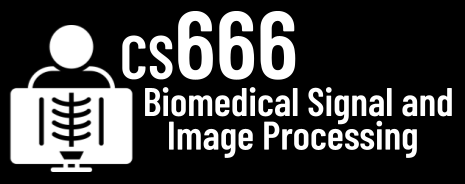

# Assignment 1

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (5 pts): Install the BioSPPY library with the following code.

In [2]:
!pip install biosppy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.2/142.2 kB 2.3 MB/s eta 0:00:00


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [3]:
from biosppy import storage
!wget https://cs666.org/data/ecg.txt
signal, metadata = storage.load_txt('ecg.txt')
print("ECG signal: ", signal)
print("Metadata: ", metadata)

--2024-02-20 03:31:17--  https://cs666.org/data/ecg.txt
Resolving cs666.org (cs666.org)... 185.199.110.153, 185.199.111.153, 185.199.108.153, ...
Connecting to cs666.org (cs666.org)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105085 (103K) [text/plain]
Saving to: ‘ecg.txt’

ecg.txt             100%[===================>] 102.62K  --.-KB/s    in 0.02s   

2024-02-20 03:31:17 (4.86 MB/s) - ‘ecg.txt’ saved [105085/105085]

ECG signal:  [2044. 2044. 2044. ... 2044. 2045. 2043.]
Metadata:  {'sampling_rate': 1000.0, 'resolution': 12, 'labels': ['ECG']}


**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [5]:
SAMPLING_RATE = 1000 ### TODO!
N = len(signal)
SECONDS = (N - 1) / SAMPLING_RATE ### TODO!

**Task 4** (15 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

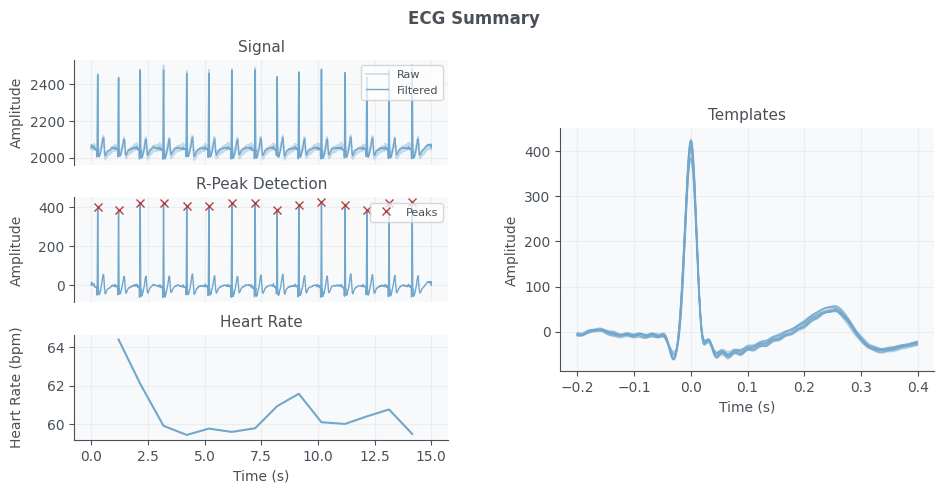

In [6]:
### TODO
from biosppy.signals import ecg
out = ecg.ecg(signal = signal, sampling_rate = SAMPLING_RATE, show = True)

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

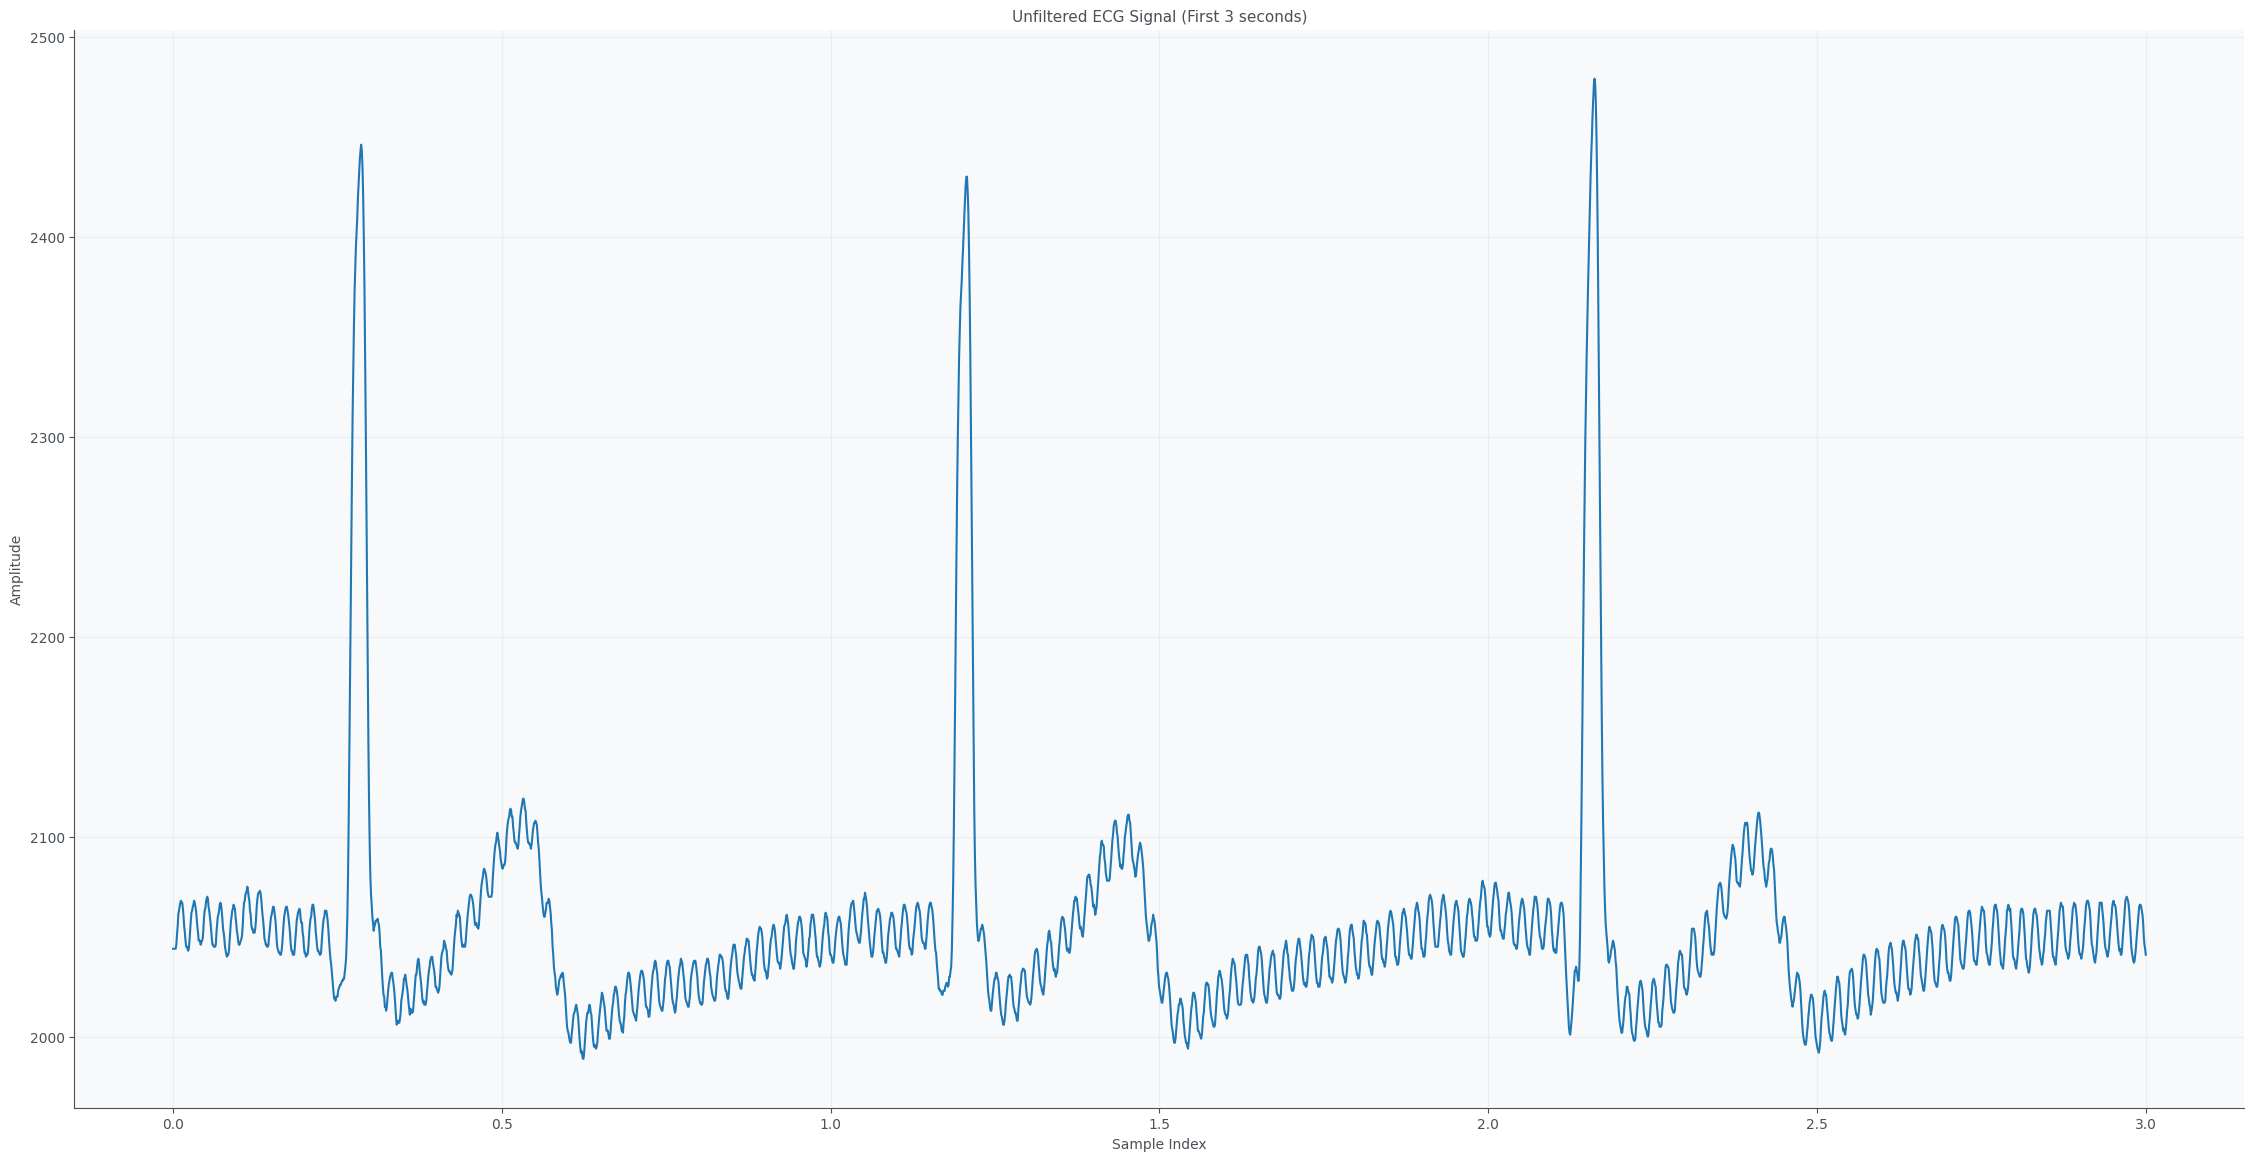

In [9]:
### TODO plot unfiltered signal
# import numpy as np
# import matplotlib.pyplot as plt
#import biosppy.signals.ecg
from biosppy import plotting
from biosppy.signals import ecg
import matplotlib.pyplot as plt
import numpy as np

duration = 3

# Calculate the number of samples corresponding to the desired duration

samples = duration * SAMPLING_RATE
ts = np.linspace(0, duration, samples)
# Extract the first 3 seconds of the unfiltered ECG signal
ecg_signal = signal[:samples]

# Plot the unfiltered ECG signal
plt.figure(figsize = (28, 14))
plt.plot(ts, ecg_signal)
plt.title('Unfiltered ECG Signal (First 3 seconds)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

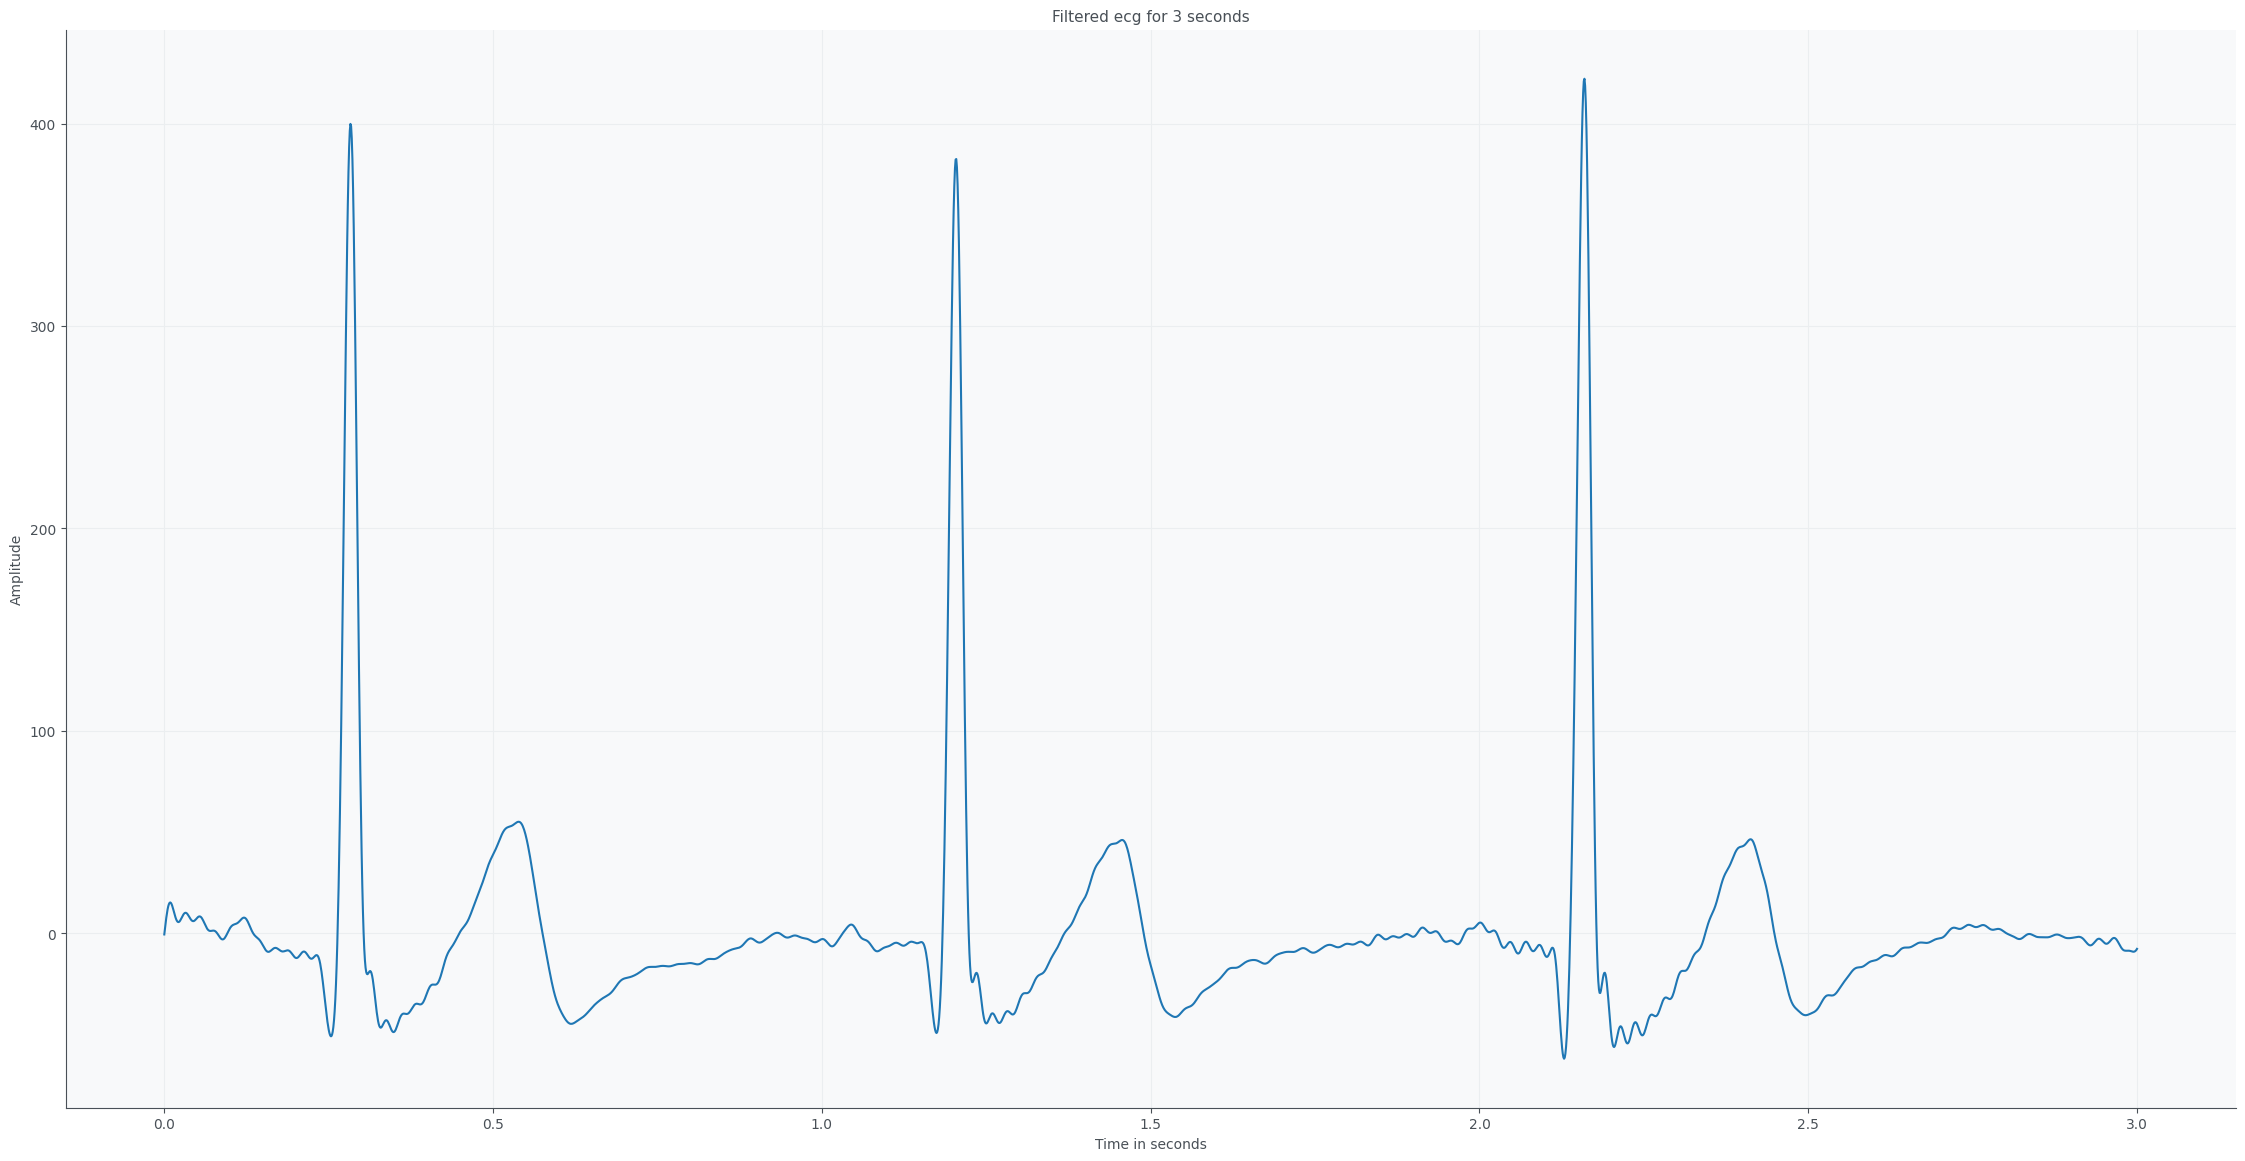

ts: [0.00000000e+00 1.00033344e-03 2.00066689e-03 ... 2.99799933e+00
 2.99899967e+00 3.00000000e+00]
filtered_ecg_signal: [-0.50199549  2.3546002   5.11019598 ... -8.51781637 -8.12749659
 -7.61597008]


In [11]:
### TODO plot filtered signal
from biosppy import plotting
from biosppy.signals import ecg
import matplotlib.pyplot as plt
import numpy as np


out = ecg.ecg(signal = signal, sampling_rate = SAMPLING_RATE, show = False)

duration = 3

samples = duration * SAMPLING_RATE

filtered_ecg_signal = out['filtered'][:samples]

plt.figure(figsize = (28, 14))
plt.plot(ts, filtered_ecg_signal)
plt.title("Filtered ecg for 3 seconds")
plt.xlabel('Time in seconds')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


print("ts:", ts)
print("filtered_ecg_signal:", filtered_ecg_signal)

# plotting.plot_ecg(ts = ts, filtered= filtered_ecg_signal,rpeaks="", templates_ts="", templates="", heart_rate_ts="", heart_rate="", path="",  show = True)


**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

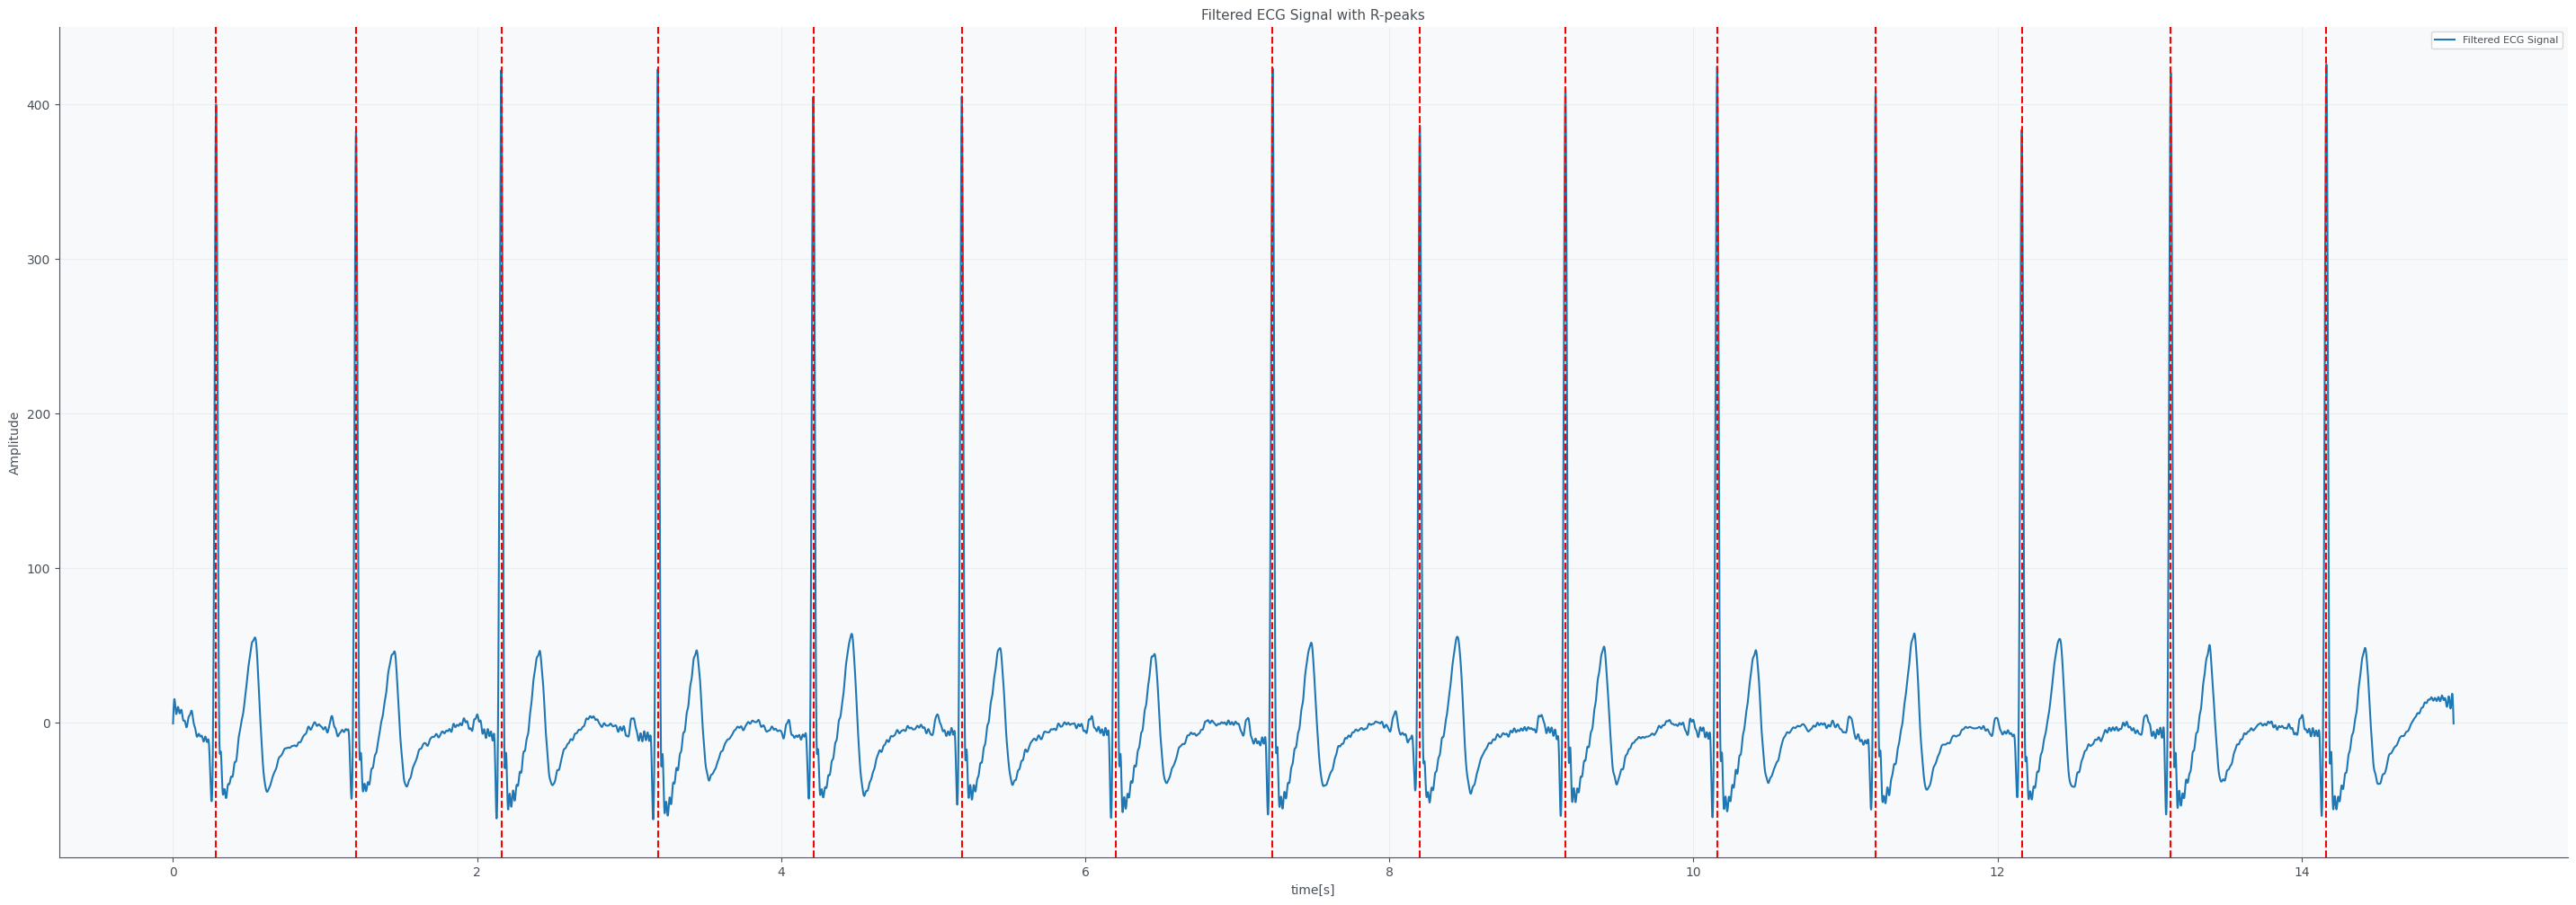

In [14]:
### TODO
import matplotlib.pyplot as plt
import numpy as np

filtered_ecg_signal = out['filtered']
rpeaks = out['rpeaks']

ts = np.arange(len(filtered_ecg_signal)) /SAMPLING_RATE

plt.figure(figsize = (36, 12))
plt.plot(ts, filtered_ecg_signal, label = "Filtered ECG Signal")
plt.title("Filtered ECG Signal with R-peaks")
plt.xlabel('time[s]')
plt.ylabel('Amplitude')

for rpeak in rpeaks:
  plt.axvline(x = rpeak/SAMPLING_RATE , color = 'r', ls = "--")

plt.grid(True)
plt.legend()
plt.show()


**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [15]:
!pip install neurokit2
import neurokit2 as nk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.0 MB/s eta 0:00:00


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

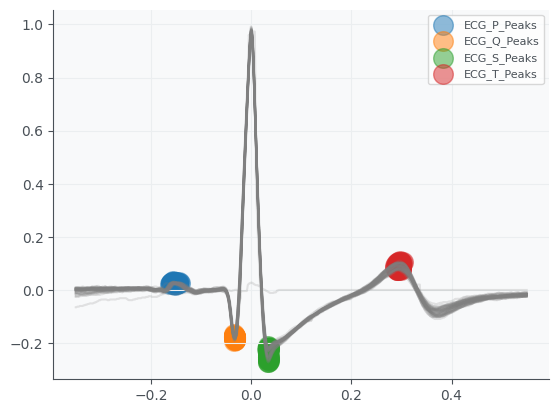

In [16]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method
import matplotlib.pyplot as plt
import numpy as np
import neurokit2 as nk

# Load ECG signal data
signal = nk.data(dataset="ecg")


# Extract R-peaks locations
_, rpeaks = nk.ecg_peaks(signal, sampling_rate=1000)

_, waves_cwt = nk.ecg_delineate(signal,
                                         rpeaks,
                                         sampling_rate=1000,
                                         method="peak",
                                         show=True,
                                         show_type='peaks')

# Plot the ECG signal with detected peaks
# plt.figure()
# plt.plot(signal, label="ECG Signal")


# plt.xlabel('Sample')
# plt.ylabel('Amplitude')
# plt.title('ECG Signal with Detected Peaks')
# plt.legend()
# plt.grid(True)
# plt.show()


In [ ]:
# TODO Does the detection work well?
Yes, this detection works well as we are able to find the peaks of P Q S T waves clealy and the graph is well defined. We are even able to get the peaks well defined


**Task 9** (10 pts): Use the sleepecg library to find the R Peaks.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 5.2 MB/s eta 0:00:00


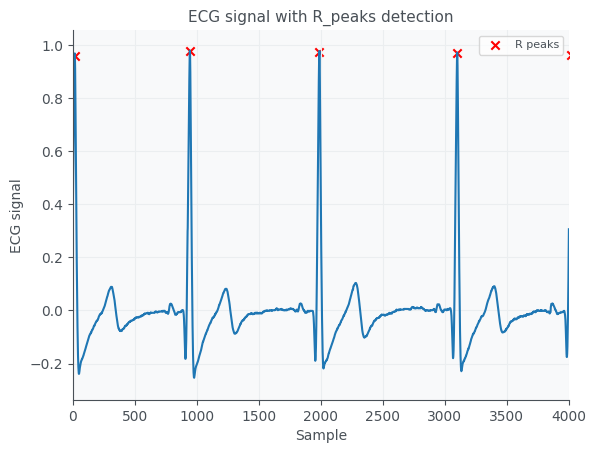

In [17]:
# We have the R spikes/peaks now from Biosppy from above but there is another
# library called sleepecg.
# TODO Please install it and run the rpeak detection!
# Docs: https://sleepecg.readthedocs.io/en/stable/

!pip install sleepecg
import sleepecg
import matplotlib.pyplot as plt

rpeaks = sleepecg.detect_heartbeats(signal, fs = 1000)

plt.figure()
plt.xlim(0, 4000)
plt.plot(signal)
plt.scatter(rpeaks, signal[rpeaks], color = 'red', marker = 'x', label = "R peaks")
plt.xlabel("Sample")
plt.ylabel("ECG signal")
plt.title("ECG signal with R_peaks detection")
plt.legend()
plt.show()


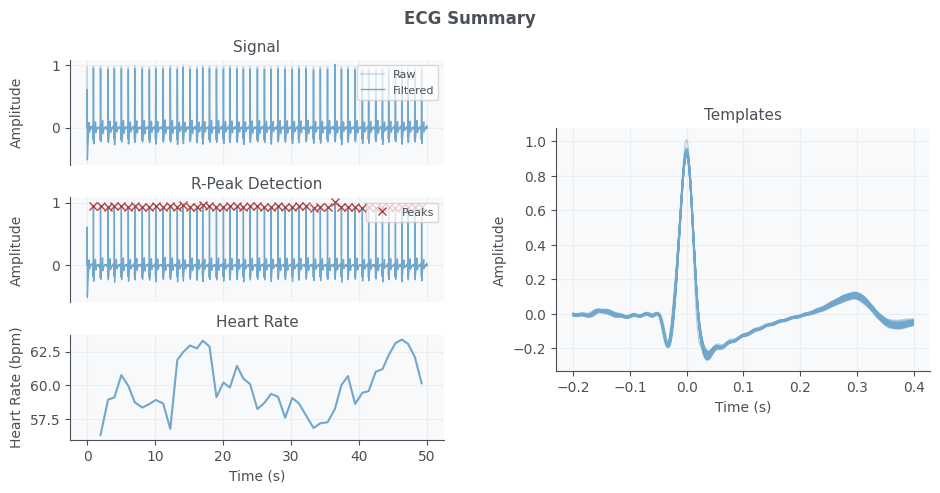

Mean Squared Error (MSE) between Biosppy and sleepecg R-peaks: 1012446.8775510204


In [18]:
# TODO Do Biosppy and sleepecg give different rpeaks? Please calculate the MSE!
import numpy as np
from sklearn.metrics import mean_squared_error
import biosppy.signals as biosppy
from biosppy.signals import ecg

out = biosppy.ecg.ecg(signal, sampling_rate=1000)
biosppy_rpeaks = out['rpeaks']

sleepecg_rpeaks = sleepecg.detect_heartbeats(signal, fs = 1000)

min_length = min(len(biosppy_rpeaks), len(sleepecg_rpeaks))
biosppy_rpeaks = biosppy_rpeaks[:min_length]
sleepecg_rpeaks = sleepecg_rpeaks[:min_length]

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(biosppy_rpeaks, sleepecg_rpeaks)

print(f"Mean Squared Error (MSE) between Biosppy and sleepecg R-peaks: {mse}")


**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal

dict_keys(['ECG_P_Peaks', 'ECG_Q_Peaks', 'ECG_S_Peaks', 'ECG_T_Peaks', 'ECG_P_Onsets', 'ECG_T_Offsets'])
dict_keys(['ECG_P_Peaks', 'ECG_Q_Peaks', 'ECG_S_Peaks', 'ECG_T_Peaks', 'ECG_P_Onsets', 'ECG_T_Offsets'])


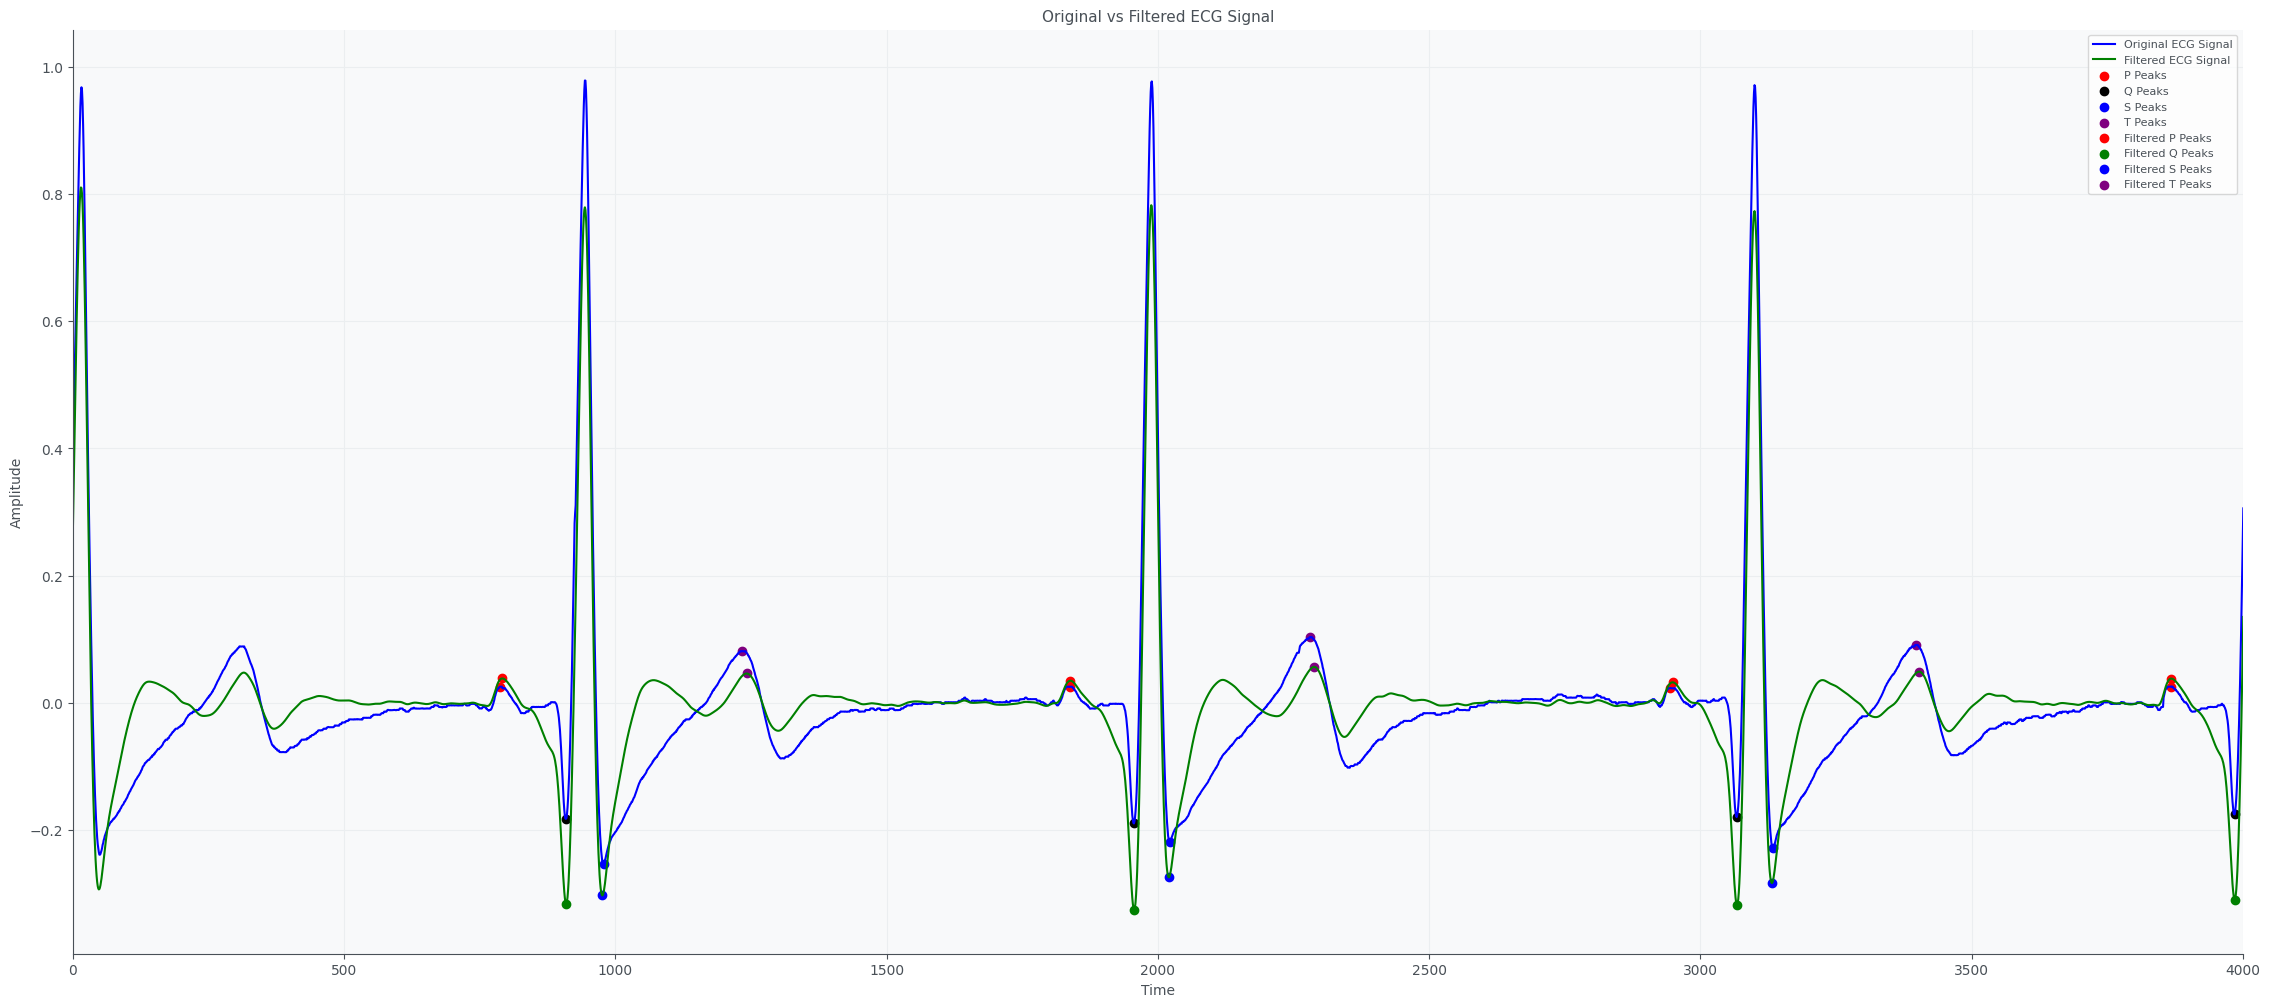

In [19]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass.
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.
import neurokit2 as nk
import matplotlib.pyplot as plt

signal = nk.data(dataset="ecg")
_, rpeaks_unfiltered = nk.ecg_peaks(signal, sampling_rate=1000)

_, waves_cwt_unfiltered = nk.ecg_delineate(signal,
                                           rpeaks_unfiltered,
                                           sampling_rate=1000,
                                           method="peak",
                                           show=False,
                                           show_type='peaks')

print(waves_cwt_unfiltered.keys())

# print("ECG_P_Peaks indices:", waves_cwt_unfiltered['ECG_P_Peaks'])

# # Convert Indices to Integers
# # If the indices are not integers, you can convert them using astype(int) or int()

# # Check Array Shapes
# print("Shape of ECG_P_Peaks array:", np.shape(waves_cwt_unfiltered['ECG_P_Peaks']))
# print("Shape of signal array:", np.shape(signal))

# valid_indices = np.where(~np.isnan(waves_cwt_unfiltered['ECG_P_Peaks']))[0]
# ECG_P_Peaks_valid = waves_cwt_unfiltered['ECG_P_Peaks'][valid_indices]

ECG_P_Peaks = waves_cwt_unfiltered['ECG_P_Peaks']
ECG_Q_Peaks = waves_cwt_unfiltered['ECG_Q_Peaks']
ECG_S_Peaks = waves_cwt_unfiltered['ECG_S_Peaks']
ECG_T_Peaks = waves_cwt_unfiltered['ECG_T_Peaks']

valid_indices_p = [int(idx) for idx in ECG_P_Peaks if not np.isnan(idx)]
valid_indices_q = [int(idx) for idx in ECG_Q_Peaks if not np.isnan(idx)]
valid_indices_s = [int(idx) for idx in ECG_S_Peaks if not np.isnan(idx)]
valid_indices_t = [int(idx) for idx in ECG_T_Peaks if not np.isnan(idx)]

ECG_P_Peaks = np.array(valid_indices_p, dtype=int)
ECG_Q_Peaks = np.array(valid_indices_q, dtype=int)
ECG_S_Peaks = np.array(valid_indices_s, dtype=int)
ECG_T_Peaks = np.array(valid_indices_t, dtype=int)

# Step 2: Filter the signal
filtered_ecg = nk.signal_filter(signal, lowcut=5, highcut=40, sampling_rate=1000)

# Step 3: Detect peaks for the filtered signal using NeuroKit
_, rpeaks_filtered = nk.ecg_peaks(filtered_ecg, sampling_rate=1000)

_, waves_cwt_filtered = nk.ecg_delineate(filtered_ecg,
                                         rpeaks_filtered,
                                         sampling_rate=1000,
                                         method="peak",
                                         show=False,
                                         show_type='peaks')

print(waves_cwt_filtered.keys())

ECG_Pf_Peaks = waves_cwt_filtered['ECG_P_Peaks']
ECG_Qf_Peaks = waves_cwt_filtered['ECG_Q_Peaks']
ECG_Sf_Peaks = waves_cwt_filtered['ECG_S_Peaks']
ECG_Tf_Peaks = waves_cwt_filtered['ECG_T_Peaks']

valid_indices_p = [int(idx) for idx in ECG_Pf_Peaks if not np.isnan(idx)]
valid_indices_q = [int(idx) for idx in ECG_Qf_Peaks if not np.isnan(idx)]
valid_indices_s = [int(idx) for idx in ECG_Sf_Peaks if not np.isnan(idx)]
valid_indices_t = [int(idx) for idx in ECG_Tf_Peaks if not np.isnan(idx)]

ECG_Pf_Peaks = np.array(valid_indices_p, dtype=int)
ECG_Qf_Peaks = np.array(valid_indices_q, dtype=int)
ECG_Sf_Peaks = np.array(valid_indices_s, dtype=int)
ECG_Tf_Peaks = np.array(valid_indices_t, dtype=int)



# Plot original and filtered signals
plt.figure(figsize=(28, 12))

plt.plot(signal, label='Original ECG Signal', color='blue')
plt.plot(filtered_ecg, label='Filtered ECG Signal', color='green')
plt.xlim(0, 4000)

plt.scatter(ECG_P_Peaks, signal[ECG_P_Peaks], color='red', label='P Peaks')
plt.scatter(ECG_Q_Peaks, signal[ECG_Q_Peaks], color='black', label='Q Peaks')
plt.scatter(ECG_S_Peaks, signal[ECG_S_Peaks], color='blue', label='S Peaks')
plt.scatter(ECG_T_Peaks, signal[ECG_T_Peaks], color='purple', label='T Peaks')

# Plot delineated waves for the filtered signal
plt.scatter(ECG_Pf_Peaks, filtered_ecg[ECG_Pf_Peaks], color='red', label='Filtered P Peaks')
plt.scatter(ECG_Qf_Peaks, filtered_ecg[ECG_Qf_Peaks], color='green', label='Filtered Q Peaks')
plt.scatter(ECG_Sf_Peaks, filtered_ecg[ECG_Sf_Peaks], color='blue', label='Filtered S Peaks')
plt.scatter(ECG_Tf_Peaks, filtered_ecg[ECG_Tf_Peaks], color='purple', label='Filtered T Peaks')

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Original vs Filtered ECG Signal')
plt.legend()
plt.show()


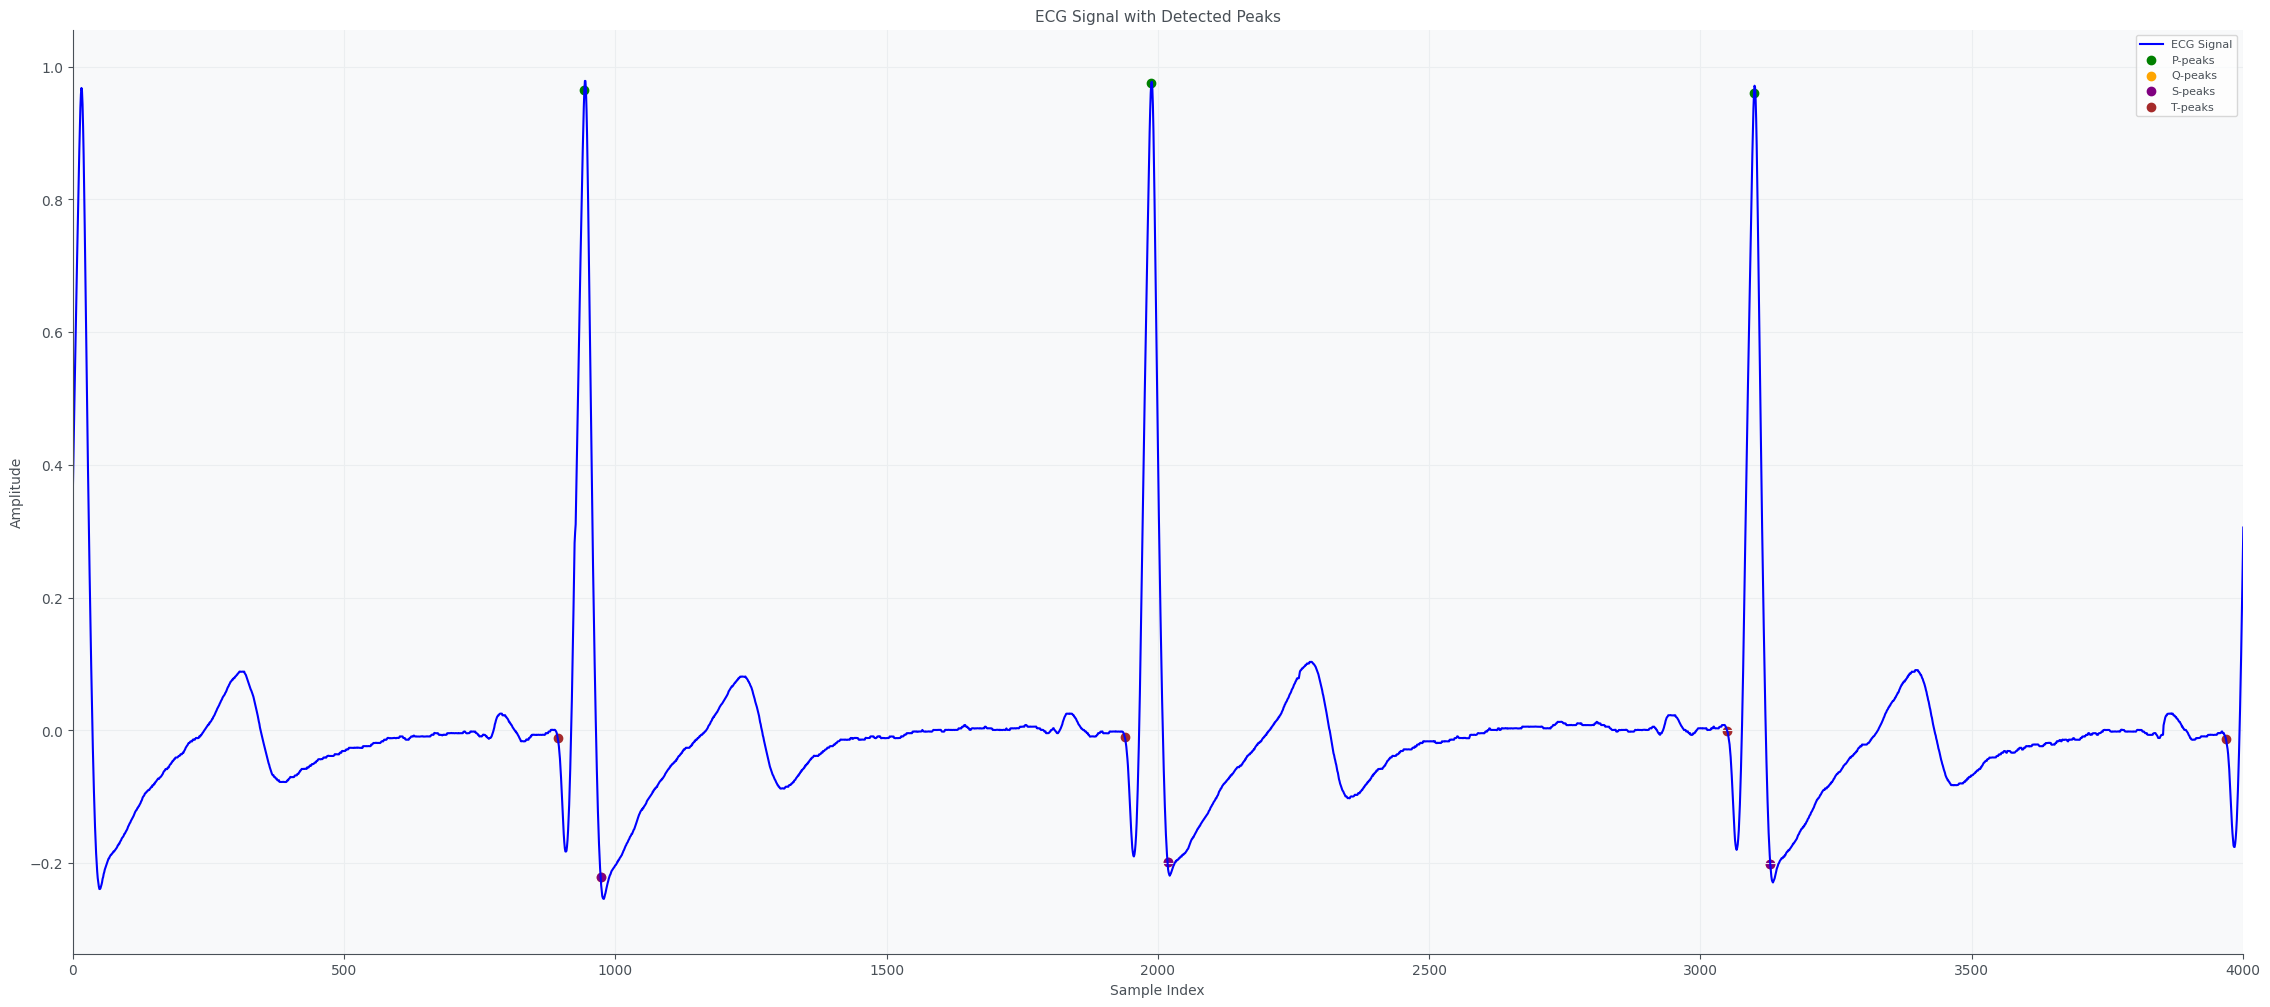

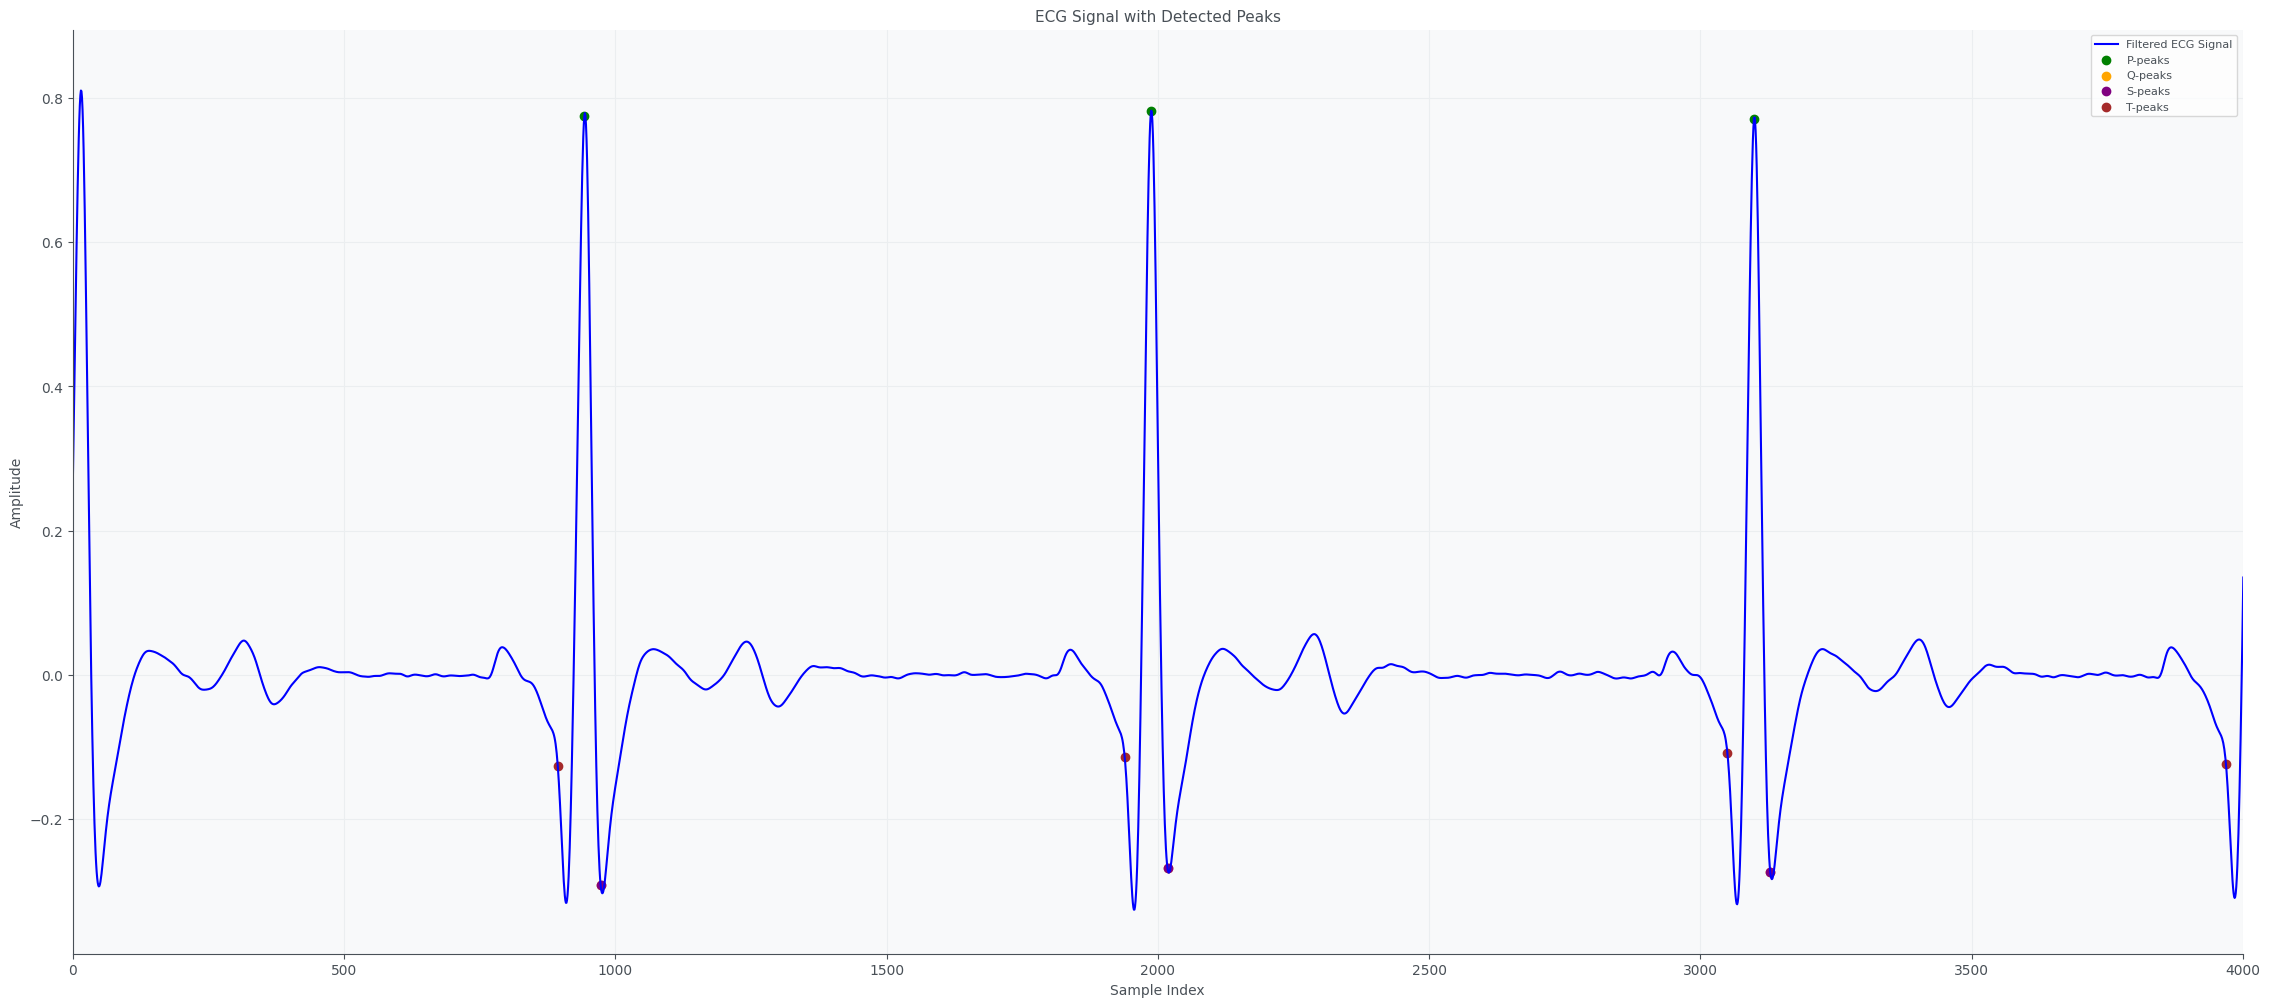

In [20]:
# Finally, run the delineation on the filtered signal from BioSPPY.
import biosppy.signals.ecg as ecg
import matplotlib.pyplot as plt
import numpy as np



segmented_signal = ecg.hamilton_segmenter(signal, sampling_rate=1000)

# Extract R-peaks
rpeaks = segmented_signal['rpeaks']

# Define window sizes for P, Q, S, T peaks
window_before = 50   # Number of samples before the R-peak
window_after_q = 30   # Number of samples after the R-peak for Q-peak
window_after_s = 30  # Number of samples after the R-peak for S-peak
window_after_t = 50   # Number of samples after the R-peak for T-peak

# Plot the ECG signal and the detected peaks
plt.figure(figsize = (28, 12))
plt.plot(signal, label='ECG Signal', color='blue', linewidth = 1.5)
plt.xlim(0, 4000) #Scaling down the value of x axis so as to not make the grapgh look clumsy. You can get full x-axis by changing the upper linmit of xlim from 4000 to len(signal)

# # Plot P-peaks
# p_peaks = []
# for rpeak in rpeaks:
#     p_peak_index = np.argmax(signal[rpeak - window_before:rpeak])
#     p_peaks.append(rpeak - window_before + p_peak_index)
# plt.scatter(p_peaks, signal[p_peaks], color='green', label='P-peaks', marker='o',s=100)

# # Plot Q-peaks
# q_peaks = []
# for rpeak in rpeaks:
#     q_peak_index = np.argmin(signal[rpeak:rpeak + window_after_q]) + rpeak
#     q_peaks.append(q_peak_index)
# plt.scatter(q_peaks, signal[q_peaks], color='orange', label='Q-peaks', marker='o', s=100)

# # Plot S-peaks
# s_peaks = []
# for rpeak in rpeaks:
#     s_peak_index = np.argmin(signal[rpeak:rpeak + window_after_s]) + rpeak
#     s_peaks.append(s_peak_index)
# plt.scatter(s_peaks, signal[s_peaks], color='purple', label='S-peaks', marker='o', s=100)

# # Plot T-peaks
# t_peaks = []
# for rpeak in rpeaks:
#     t_peak_index = np.argmax(signal[rpeak:rpeak + window_after_t]) + rpeak
#     t_peaks.append(t_peak_index)
# plt.scatter(t_peaks, signal[t_peaks], color='brown', label='T-peaks', marker='o', s=100)

# plt.xlabel('Sample Index')
# plt.ylabel('Amplitude')
# plt.title('ECG Signal with Detected Peaks')
# plt.legend()
# plt.show()

p_peaks = [rpeak - window_before + np.argmax(signal[rpeak - window_before:rpeak]) for rpeak in rpeaks]
plt.scatter(p_peaks, signal[p_peaks], color='green', label='P-peaks')

# Plot Q-peaks
q_peaks = [np.argmin(signal[rpeak:rpeak + window_after_q]) + rpeak for rpeak in rpeaks]
plt.scatter(q_peaks, signal[q_peaks], color='orange', label='Q-peaks')

# Plot S-peaks
s_peaks = [np.argmin(signal[rpeak:rpeak + window_after_s]) + rpeak for rpeak in rpeaks]
plt.scatter(s_peaks, signal[s_peaks], color='purple', label='S-peaks')

# Plot T-peaks
t_peaks = [rpeak - window_before + np.argmax(signal[rpeak:rpeak + window_after_t]) for rpeak in rpeaks]
plt.scatter(t_peaks, signal[t_peaks], color='brown', label='T-peaks')

plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('ECG Signal with Detected Peaks')
plt.legend()
plt.show()


filtered_segmented_signal = ecg.hamilton_segmenter(filtered_ecg, sampling_rate=1000)

# Extract R-peaks from the filtered signal
filtered_rpeaks = filtered_segmented_signal['rpeaks']

# Plot the filtered ECG signal and the detected peaks
plt.figure(figsize=(28, 12))
plt.plot(filtered_ecg, label='Filtered ECG Signal', color='blue', linewidth=1.5)
plt.xlim(0, 4000)

# Plot P-peaks
# p_peaks = []
# for rpeak in filtered_rpeaks:
#     p_peak_index = np.argmax(filtered_ecg[rpeak - window_before:rpeak])
#     p_peaks.append(rpeak - window_before + p_peak_index)
# plt.scatter(p_peaks, filtered_ecg[p_peaks], color='green', label='P-peaks', marker='o', s=100)

# # Plot Q-peaks
# q_peaks = []
# for rpeak in filtered_rpeaks:
#     q_peak_index = np.argmin(filtered_ecg[rpeak:rpeak + window_after_q]) + rpeak
#     q_peaks.append(q_peak_index)
# plt.scatter(q_peaks, filtered_ecg[q_peaks], color='orange', label='Q-peaks', marker='o', s=100)

# # Plot S-peaks
# s_peaks = []
# for rpeak in filtered_rpeaks:
#     s_peak_index = np.argmin(filtered_ecg[rpeak:rpeak + window_after_s]) + rpeak
#     s_peaks.append(s_peak_index)
# plt.scatter(s_peaks, filtered_ecg[s_peaks], color='purple', label='S-peaks', marker='o', s=100)

# # Plot T-peaks
# t_peaks = []
# for rpeak in filtered_rpeaks:
#     t_peak_index = np.argmax(filtered_ecg[rpeak:rpeak + window_after_t]) + rpeak
#     t_peaks.append(t_peak_index)
# plt.scatter(t_peaks, filtered_ecg[t_peaks], color='brown', label='T-peaks', marker='o', s=100)

# plt.xlabel('Sample Index')
# plt.ylabel('Amplitude')
# plt.title('Filtered ECG Signal with Detected Peaks')
# plt.legend()
# plt.show()


p_peaks = [rpeak - window_before + np.argmax(filtered_ecg[rpeak - window_before:rpeak]) for rpeak in rpeaks]
plt.scatter(p_peaks, filtered_ecg[p_peaks], color='green', label='P-peaks')

# Plot Q-peaks
q_peaks = [np.argmin(filtered_ecg[rpeak:rpeak + window_after_q]) + rpeak for rpeak in rpeaks]
plt.scatter(q_peaks, filtered_ecg[q_peaks], color='orange', label='Q-peaks')

# Plot S-peaks
s_peaks = [np.argmin(filtered_ecg[rpeak:rpeak + window_after_s]) + rpeak for rpeak in rpeaks]
plt.scatter(s_peaks, filtered_ecg[s_peaks], color='purple', label='S-peaks')

# Plot T-peaks
t_peaks = [rpeak - window_before + np.argmax(filtered_ecg[rpeak:rpeak + window_after_t]) for rpeak in rpeaks]
plt.scatter(t_peaks, filtered_ecg[t_peaks], color='brown', label='T-peaks')

plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('ECG Signal with Detected Peaks')
plt.legend()
plt.show()


In [ ]:
# TODO Which one works the best?
It was better when using the neurokit2 package for finding out the peaks of p, q, s,t as there were methods that would easily give us the peaks in a dictionary format both before and after filtering.
But when we were using the Biosppy package to find out the p q s t peaks, there was lot of things that are needed to be defined such as the window size and were not able to get the correct pin point peaks of the the ecg signal even after filtering

SyntaxError: invalid syntax (<ipython-input-100-2334600d038e>, line 2)

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#